In [ ]:
#Question 1

#Importing necessary libraries in python
import pandas as pd

#Importing dataframe from ECA_data file on desktop
data = pd.read_csv("/Users/chihang/Desktop/ECA_data.csv")

#Setting up a list that only consist of categorical variables
categorical_list = data.loc[:,['ID','RATING','GENDER','EDUCATION','MARITAL','S1','S2','S3','S4','S5']]

#Setting up a list that only consist of numeric columns
numeric_list = data.loc[:,['LIMIT','BALANCE','INCOME','B1','B2','B3','B4','B5','R1','R2','R3','R4','R5']]

print(categorical_list)
print(numeric_list)

In [ ]:
#Question 2

#Importing necessary libraries in python
import pandas as pd

#Data pre-processing tasks
#(1st method)Specify and remove missing values 
#Define specific strings such as str with white spaces("") as missing values during the import process
clean_data_one = pd.read_csv("/Users/chihang/Desktop/ECA_data.csv",
      na_values = "na_string", na_filter = True)

#Locate missing data in the dataframe
clean_data_one.isnull().sum(axis = 0)


In [1]:
#Question 2

#(2nd method)Replacing missing data with mean/mode/median
#Importing necessary libraries in python
import pandas as pd

# Define specific strings such as str with white spaces("") as missing values during the import process
clean_data_two = pd.read_csv("/Users/chihang/Desktop/ECA_data.csv",
      na_values = "na_string", na_filter = True)

#Locate missing data in the dataframe
clean_data_two.isnull().sum(axis = 0)

#EDUCATION and MARITAL are categorical, hence will be using mode to replace the missing values
for column in ['EDUCATION', 'MARITAL']:
    clean_data_two[column].fillna(clean_data_two[column].mode()[0], inplace=True)

#Check that the missing values have indeed been replaced
clean_data_two.isnull().sum(axis = 0)

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

In [ ]:
#Question 2

#(3rd method)Removing outliers through inter quartile range
#Importing necessary libraries in python
import pandas as pd

#Importing dataframe from ECA_data file on desktop
data = pd.read_csv("/Users/chihang/Desktop/ECA_data.csv")

#Setting up a list that only consist of numeric columns
#Only using numeric columns as there are only a fixed possible outcomes for categorical columns
#Removed R3 column due to index error that cant be solved
numeric_list_two = data.loc[:,['LIMIT','BALANCE','INCOME','B1','B2','B3','B4','B5','R1','R2','R4','R5']]

#Check number of values in the dataframe before cleaning
numeric_list_two.info()

#Setting of interquartile range according to 0.25 and 0.75 percentile
Q1 = numeric_list_two.quantile(0.25)
Q3 = numeric_list_two.quantile(0.75)
IQR = Q3 - Q1

#Removing of outliers that exceeds the interquartile range
cleaned_numeric_list = numeric_list_two[
    ~((numeric_list_two < (Q1 - 1.5 * IQR)) 
      |(numeric_list_two > (Q3 + 1.5 * IQR))).any(axis=1)]

#Check number of values in the dataframe after cleaning
cleaned_numeric_list.info()

In [ ]:
#Question 2

#(4th method)Discretisation for income 
#Importing necessary libraries in python
import pandas as pd
import numpy as np

#Importing dataframe from ECA_data file on desktop
data = pd.read_csv("/Users/chihang/Desktop/ECA_data.csv")

#Using cut() function to bin the income data into 52 different categories for easier identification
data['INCOME'] = pd.cut(np.array(data['INCOME']), 5, 
                  labels=["Very Low Income", 
                   "Low Income", "Middle Income", "High Income", 
                    "Very High Income"])

#Shows dataframe
data

In [2]:
#Question 3

#(1st Insight)Descriptive statistics for numerical columns
#Importing necessary libraries in python
import matplotlib.pyplot as plt
import pandas as pd

#Coverting numeric columns into a new dataframe for easier processing
Numeric_df = pd.DataFrame(clean_data_two,columns
                =['LIMIT','BALANCE','INCOME',
                 'B1','B2','B3','B4','B5','R1','R2','R3','R4','R5'])

#Use describe function to showcase the descriptive statistics of the data rounded to up 2 decimal place
Numeric_df.describe().round(2)

,LIMIT,BALANCE,INCOME,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00,18769.00
mean,168275.54,9119.89,177765.81,49985.76,48168.32,45025.37,41058.51,39624.96,6026.39,5651.75,4764.09,5185.54
std,129405.29,13045.37,143092.43,71927.41,70318.91,66107.28,61697.04,59913.09,22898.99,18614.89,15031.28,17424.05
min,10000.00,0.00,10000.00,-69777.00,-157264.00,-65167.00,-81334.00,-209051.00,0.00,0.00,0.00,0.00
25%,50000.00,640.33,56494.00,3081.00,2845.00,2513.00,1950.00,1430.00,1000.00,579.00,285.00,215.00
50%,140000.00,3959.02,148225.00,21386.00,20421.00,19502.00,18356.00,17419.00,2132.00,2000.00,1508.00,1547.00
75%,240000.00,11975.25,256826.00,65145.00,61943.00,57687.00,50758.00,49792.00,5002.00,5000.00,4068.00,4095.00
max,800000.00,130692.45,908846.00,743970.00,855086.00,706864.00,823540.00,514975.00,1227082.00,889043.00,426529.00,527143.00


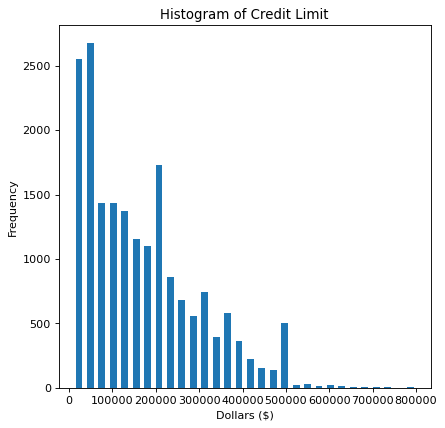

In [3]:
#Question 3

#(2st Insight)Histogram of credit limits
#Importing necessary libraries in python
import matplotlib.pyplot as plt

#Will be using the cleaned data set w/ missing value replaced (2nd method)
#Convert the "LIMIT" column of the dataframe into a list 
limit_list = list(clean_data_two["LIMIT"])

#rmin and rmax are the minimum and maximum value of the list
rmin = min(limit_list)
rmax = max(limit_list)

#Allocating of areas for the figure
plt.figure(figsize=(6,6), dpi=80)

#Histogram with 30 bins, ranging from rmin to rmax, bins are centered between the bin edges, vertical orientation, relative width 0f 60%
plt.hist(limit_list, bins=30, range=(rmin, rmax), align="mid", orientation="vertical", rwidth=0.6)
plt.title("Histogram of Credit Limit")
plt.xlabel("Dollars ($)")
plt.ylabel("Frequency")
plt.show()

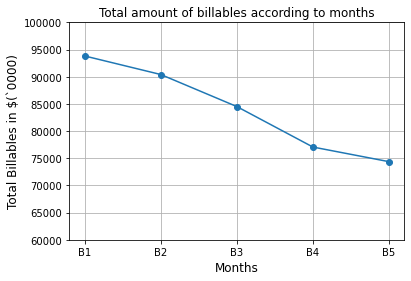

In [4]:
#Question 3

#(3rd Insight)Line graph of customer's billable according months
#Importing necessary libraries in python
import matplotlib.pyplot as plt

#Will be using the cleaned data set w/ missing value replaced (2nd method)
#Creating a list of the total sum of billables divided by 10000
Billable_list = clean_data_two.loc[:,['B1','B2','B3','B4','B5']].sum()/10000

#Line graph of billables with y-axis range from 600000 to 1000000, font size 12, with markers and gridlines
plt.plot(Billable_list,marker='o')
plt.title('Total amount of billables according to months', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total Billables in $(`0000)', fontsize=12)
plt.ylim(60000,100000)
plt.grid(True)
plt.show()

78.07555198669434
21.924449503421783


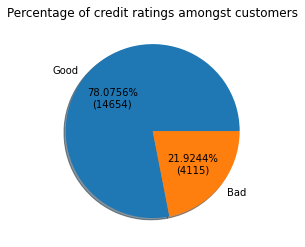

In [5]:
#Question 3

#(4th Insight)Pie chart of customer's ratings
#Importing necessary libraries in python
import matplotlib.pyplot as plt
import pandas as pd

#Replace variables 0 and 0 with Good and Bad respectively
Ratings_df = clean_data_two['RATING'].replace(0, "Good").replace(1, "Bad")

#Check the value counts of each unique variable 
Ratings_df.value_counts()

#Creating the index list
Ratings_index = ['Good', 'Bad']
 
#Creating the data list  
Ratings_data = [14654, 4115]

#Setting the format of the percentage  
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, 18769*x/100)

#Creating pie chart of credit ratings
plt.pie(Ratings_data, labels = Ratings_index, autopct=my_fmt, shadow=True)
plt.title("Percentage of credit ratings amongst customers")

#show pie chart
plt.show()

In [18]:
#Question 3

#(5th Insight)repayment status across months
#Importing necessary libraries in python
import matplotlib.pyplot as plt
import pandas as pd

#Coverting numeric columns into a new dataframe for easier processing
Status_df = pd.DataFrame(clean_data_two,columns =['S1','S2','S3','S4','S5'])

#Function to show all columns and names in the dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#Show total counts of each variables in the dataframe
#Realised that that there were NaN(missing)values
Status_df_two = Status_df.apply(pd.Series.value_counts)

#Check for number off missing values
Status_df_two.isnull().sum(axis = 0)

#Use mode to replace categorical missing values
for column in ['S1','S2','S3','S4','S5']:
    Status_df_two[column].fillna(Status_df_two[column].mode()[0], inplace=True)

#check that the missing values have indeed been replaced
Status_df_two.isnull().sum(axis = 0)

#Show final table
print(Status_df_two)

         S1     S2       S3       S4       S5
-1   3603.0   3536   3463.0   3330.0   3307.0
 0  12372.0  12612  12965.0  13622.0  13659.0
 1     19.0      1      1.0      3.0      9.0
 2   2469.0   2369   2136.0   1603.0   1598.0
 3    208.0    179    104.0    104.0    115.0
 4     72.0     42     39.0     56.0     36.0
 5     13.0      8     18.0     11.0     11.0
 6      5.0     11      2.0      3.0      9.0
 7      8.0      9     41.0     40.0     34.0
 8      5.0      2      1.0      3.0      9.0


Coefficient of determination (R^2): 0.9
X Coefficients: [[   0.      5.28 1433.13   85.91  102.45  549.92]]
Intercept: [-69.86]
Y = 0.01(X), 5.28(X2), 1433.13(X3), 85.91(X4), 102.45(X5), 549.92(X6) - 69.86


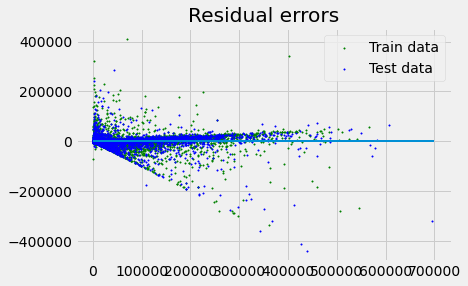

In [234]:
#Question 4

#Importing neccessary libraries in python
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression


#Coverting numeric columns into a new dataframe for easier processing
X_df = clean_data_two.loc[:,['LIMIT','BALANCE','RATING','GENDER','EDUCATION','MARITAL']]
Y_df = clean_data_two.loc[:,['B1']]

#Define X variables and response vector Y
X = X_df
Y = Y_df
  
#Split X and Y into training and testing sets (60% training data & 40% test data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,
                                                    random_state=1)
#Create linear regression object
reg = linear_model.LinearRegression()
  
#Train the model using the training sets
reg.fit(X_train, Y_train)

#Make predictions using the testing set
Y_pred = reg.predict(X_test)

#Predict the Y values for the first 5 row in the testing set
Y_pred[0:5,0]

#Rounding off parametres from regression model to 2 decimal places
r_square = np.round(reg.score(X_test, Y_test),2)
Coefficients = np.round(reg.coef_, 2)
Intercept_c = np.round(reg.intercept_, 2)

#Variance score
print("Coefficient of determination (R^2):",r_square)

#Regression coefficients 
print("X Coefficients:",Coefficients)

#Intercept
print("Intercept:",Intercept_c)

#After obtaining the values, plot regression equation
print("Y = 0.01(X), 5.28(X2), 1433.13(X3), 85.91(X4), 102.45(X5), 549.92(X6) - 69.86")
    
#Plot for residual error
#Setting plot style
plt.style.use('fivethirtyeight')
  
#Plotting residual errors in training data
plt.scatter(reg.predict(X_train), Y_train - reg.predict(X_train),
            color = "green", s = 2, label = 'Train data')
  
#Plotting residual errors in test data
plt.scatter(reg.predict(X_test), Y_test - Y_pred,
            color = "blue", s = 2, label = 'Test data')
  
#Plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 700000, linewidth = 2)
  
#Plotting legend
plt.legend(loc = 'upper right')
  
#Plot title
plt.title("Residual errors")
  
#show plot
plt.show()